In [1]:
import os
from pathlib import Path

In [2]:
import tensorflow as tf
import cv2 as cv
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

2025-06-23 21:14:37.003826: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-23 21:14:37.009194: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-23 21:14:37.024797: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750706077.048488  147310 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750706077.055404  147310 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750706077.070192  147310 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
def plot_history(history):
  fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  print(history.history.keys())
  epoch = range(len(loss))

  ax1.plot(epoch, loss, label="Training Loss")
  ax1.plot(epoch, val_loss, label="Validation Loss")
  ax1.set_xlabel("Epoch")
  ax1.set_ylabel("Loss")
  ax1.legend()

  ax2.plot(epoch, accuracy, label="Training Accuracy")
  ax2.plot(epoch, val_accuracy, label="Validation Accuracy")
  ax2.set_xlabel("Epoch")
  ax2.set_ylabel("Loss")
  ax2.legend()

In [4]:
data_dir = Path(os.getcwd()) / ".dataset"
train_direcory = data_dir / "Training"
test_direcory = data_dir / "Testing"

In [11]:
_seed = 9118487
validation_split = .2

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_direcory,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    validation_split=validation_split,
    subset='training',
    seed=_seed
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    train_direcory,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    validation_split=validation_split,
    subset='validation',
    seed=_seed
)

test_dateset = tf.keras.utils.image_dataset_from_directory(
    test_direcory,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    seed=_seed
)

Found 2870 files belonging to 4 classes.
Using 2296 files for training.
Found 2870 files belonging to 4 classes.
Using 574 files for validation.
Found 394 files belonging to 4 classes.


In [12]:
for images, labels in train_dataset.take(1):
    img = images[0].numpy().astype("uint8")
    # label = labels[0].numpy()
    label = labels[0]
    input_data_shape = np.array(img).shape

2025-06-23 21:20:28.439240: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


label: 3
shape: (256, 256, 3)
image:


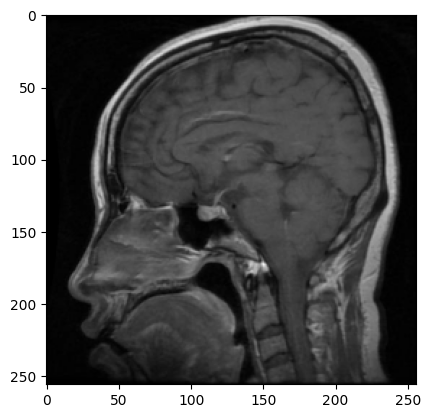

In [13]:
print(f"label: {label}")
print(f"shape: {np.array(img).shape}")
print("image:")
plt.imshow(img)
plt.show()

# Model MLP

In [17]:
mlp_model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=input_data_shape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(len(train_dataset.class_names), activation='softmax')
    ]
)

mlp_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/home/mateusz/dev/pjatk_wum_project/.env/neural_net/lib64/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
mlp_history = mlp_model.fit(train_dataset, validation_data=validation_dataset, epochs=10)

Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 23s 311ms/step - accuracy: 0.3526 - loss: 2865.3423 - val_accuracy: 0.2735 - val_loss: 1.5226
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 22s 310ms/step - accuracy: 0.2996 - loss: 1.4959 - val_accuracy: 0.2648 - val_loss: 1.3636
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 23s 323ms/step - accuracy: 0.3086 - loss: 1.3535 - val_accuracy: 0.2648 - val_loss: 1.3561
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 25s 342ms/step - accuracy: 0.2972 - loss: 1.3537 - val_accuracy: 0.2666 - val_loss: 1.3521
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 25s 348ms/step - accuracy: 0.3037 - loss: 1.3465 - val_accuracy: 0.2648 - val_loss: 1.3500
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 24s 339ms/step - accuracy: 0.3053 - loss: 1.3459 - val_accuracy: 0.2648 - val_loss: 1.3488
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 25s 348ms/step - accuracy: 0.2926 - loss: 1.3494 - val_accuracy: 0.2648 - val_loss: 1.3483
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 25s 343ms/step - accuracy: 0.3044 - loss: 1.3438 - val_a

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


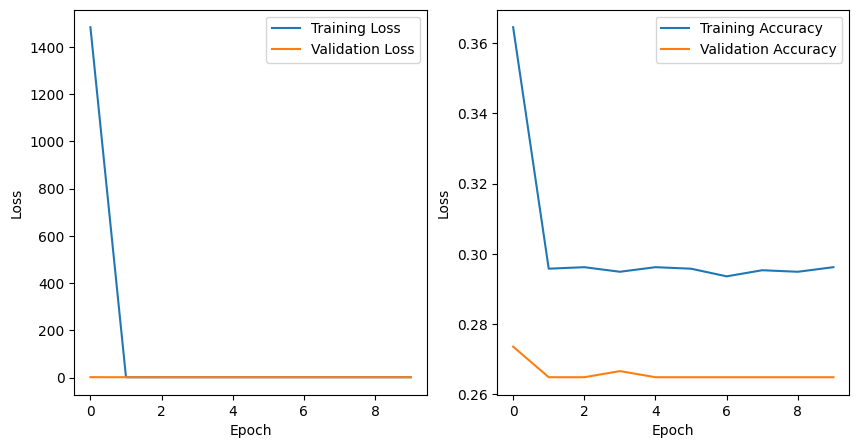

In [19]:
plot_history(mlp_history)

In [23]:
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(test_dateset)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.2899 - loss: 1.4021


In [24]:
print(f"test accuracy: {mlp_test_acc:.4f}")

test accuracy: 0.2690


In [25]:
cnn_model = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255, input_shape=input_data_shape),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(128, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(.3),
        tf.keras.layers.Dense(len(train_dataset.class_names), activation='softmax')
    ]
)

cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/home/mateusz/dev/pjatk_wum_project/.env/neural_net/lib64/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
cnn_history = cnn_model.fit(train_dataset, validation_data=validation_dataset, epochs=10)

Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.4366 - loss: 1.3798 - val_accuracy: 0.6829 - val_loss: 0.7179
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 187s 3s/step - accuracy: 0.7240 - loss: 0.6536 - val_accuracy: 0.7892 - val_loss: 0.5783
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.8150 - loss: 0.4529 - val_accuracy: 0.8240 - val_loss: 0.4478
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.8834 - loss: 0.2950 - val_accuracy: 0.8571 - val_loss: 0.3786
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 209s 3s/step - accuracy: 0.9049 - loss: 0.2288 - val_accuracy: 0.8554 - val_loss: 0.4202
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 226s 3s/step - accuracy: 0.9503 - loss: 0.1494 - val_accuracy: 0.9024 - val_loss: 0.3492
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 222s 3s/step - accuracy: 0.9627 - loss: 0.0960 - val_accuracy: 0.8955 - val_loss: 0.3792
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 226s 3s/step - accuracy: 0.9750 - loss: 0.0805 - val_accuracy: 0.8937 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


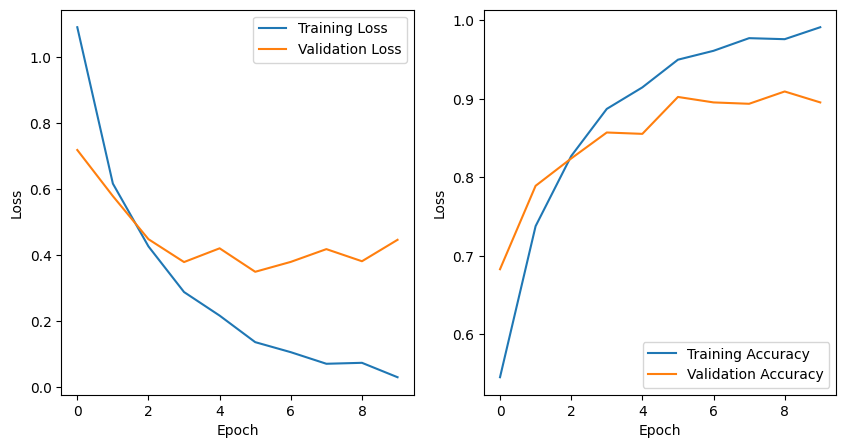

In [27]:
plot_history(cnn_history)

In [28]:
cnn_model_loss, cnn_model_acc = cnn_model.evaluate(test_dateset)

13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 715ms/step - accuracy: 0.7275 - loss: 4.4391


In [29]:
print(f"test accuracy: {cnn_model_acc:.4f}")

test accuracy: 0.7107


In [31]:
# save cnn model
cnn_model.save("cnn_model.keras")

# Automatyczne strojenie MLP z KerasTuner i EarlyStopping
W tej sekcji znajdziemy najlepszą architekturę MLP korzystając z KerasTuner oraz callbacku EarlyStopping.

In [ ]:
# Install KerasTuner if not already installed
try:
    import keras_tuner as kt
except ImportError:
    !pip install keras-tuner --quiet
    import keras_tuner as kt

In [ ]:
def build_mlp_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=input_data_shape))
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(tf.keras.layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation=hp.Choice('activation', ['relu', 'tanh'])
        ))
        if hp.Boolean('use_dropout'):
            model.add(tf.keras.layers.Dropout(rate=hp.Float('dropout', 0.1, 0.5, step=0.1)))
    model.add(tf.keras.layers.Dense(len(train_dataset.class_names), activation='softmax'))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
tuner = kt.RandomSearch(
    build_mlp_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='mlp_tuner_dir',
    project_name='mlp_tuning'
)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

tuner.search(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20,
    callbacks=[early_stop]
)

best_hps = tuner.get_best_hyperparameters(1)[0]
print('Najlepsze hiperparametry:')
for k, v in best_hps.values.items():
    print(f'{k}: {v}')

In [ ]:
# Trenowanie i ocena najlepszego modelu MLP
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20,
    callbacks=[early_stop]
)

mlp_tuned_test_loss, mlp_tuned_test_acc = best_model.evaluate(test_dateset)
print(f"Tuned MLP test accuracy: {mlp_tuned_test_acc:.4f}")